In [1]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
data = pd.read_csv("../../Model/cleaned_dataset.csv")
backup_data = pd.read_csv("../../Model/cleaned_dataset.csv")

In [2]:
import numpy as np

# Detect outliers using the IQR method
for col in ['Mileage', 'Horse Power', 'Age', 'Price']:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out outliers
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

print("Data Shape After Outlier Removal:", data.shape)

Data Shape After Outlier Removal: (4285, 13)


In [3]:
data.drop(columns=['Posting Month'])
X = data.drop(columns=['Price','Posting Month'])  
y = data['Price']

In [4]:
X.shape, y.shape

((4285, 11), (4285,))

In [5]:
categorical_columns = ['Manufacturer', 'Model', 'Transmission', 'Fuel', 'country_of_origin']
numerical_columns = ['Horse Power', 'Mileage', 'Posting Year', 'Age', 'price_per_km', 'price_per_horsepower']

In [6]:
ct = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(sparse_output=False), categorical_columns),  # Encode categorical features
    ],
    remainder='passthrough'  # Pass numerical features as-is
)

In [7]:
X_encoded = ct.fit_transform(X)

In [8]:
encoded_feature_names = (
    ct.named_transformers_['cat'].get_feature_names_out(categorical_columns).tolist()
    + numerical_columns
)
X_encoded_df = pd.DataFrame(X_encoded, columns=encoded_feature_names)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size = 0.2, random_state = 0)

In [10]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3428, 574), (857, 574), (3428,), (857,))

----------------------------------MODEL--------------------------------------------

In [11]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(splitter = 'random')
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
y_predict = pd.DataFrame(y_predict, columns = ['Predicted Output'])
results = pd.concat([y_predict, y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False)

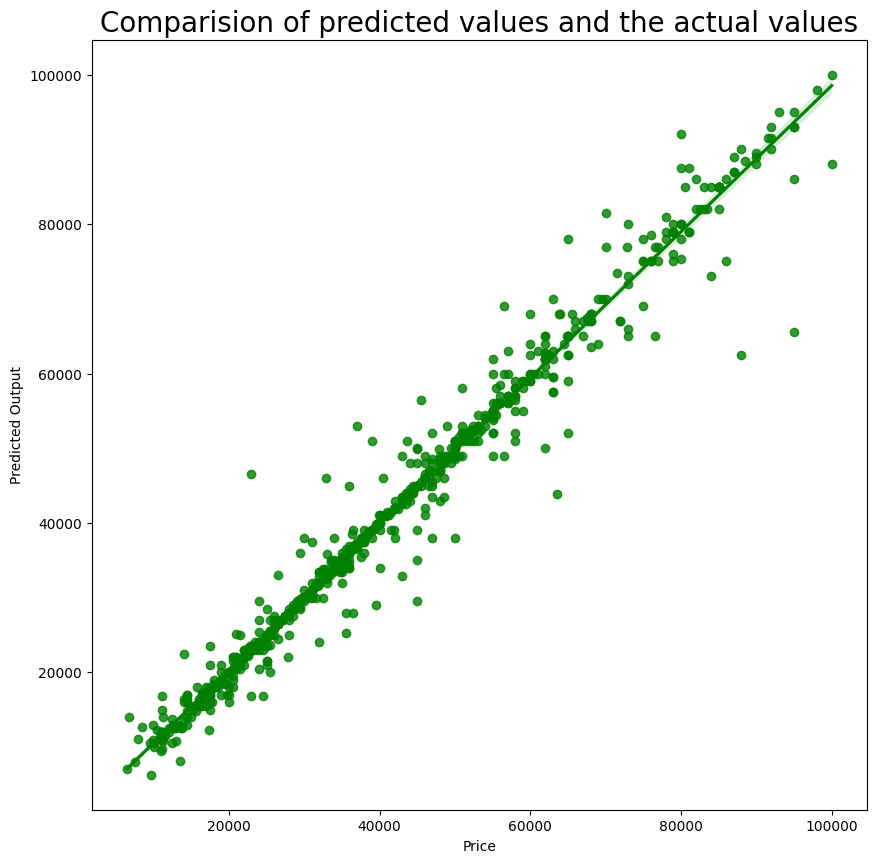

In [14]:
plt.figure(figsize = (10, 10))
sns.regplot(data = results, y = 'Predicted Output', x = 'Price', color = 'green', marker = 'o')
plt.title("Comparision of predicted values and the actual values", fontsize = 20)
plt.show()

C:\Users\Msi Rtx\AppData\Local\Temp\ipykernel_8616\2473647361.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_predict)


<Axes: xlabel='Price', ylabel='Density'>

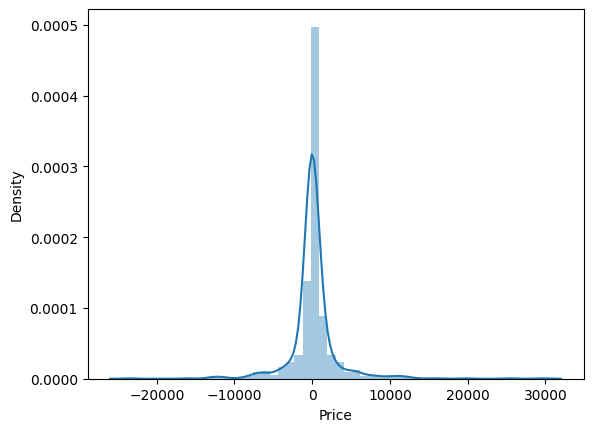

In [17]:
import seaborn as sns
y_predict = model.predict(X_test)
sns.distplot(y_test-y_predict)

In [ ]:
import seaborn as sns

y_predict = pd.DataFrame(y_pred, columns = ['Predicted Output'])

results = pd.concat([y_predict, y_test.reset_index(drop = True)], axis = 1, ignore_index = False)

plt.figure(figsize = (10, 10))
sns.regplot(data = results, y = 'Predicted Output', x = 'Price', color = 'teal', marker = 'o')
plt.title("Comparision of predicted values and the actual values", fontsize = 20)
plt.show()

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score


mae_new = mean_absolute_error(y_test, y_predict)
mse_new = mean_squared_error(y_test, y_predict)
r2_new = r2_score(y_test, y_predict)

print(f"MAE après suppression: {mae_new}")
print(f"MSE après suppression: {mse_new}")
print(f"R² après suppression: {r2_new}")

MAE après suppression: 1427.73512252042
MSE après suppression: 10379259.73512252
R² après suppression: 0.9741131062962465


In [18]:
train_acc=DecisionTreeRegressor.score(X_train,y_train)
test_acc=DecisionTreeRegressor.score(X_test,y_test)
print('Training Accuracy: ',round(train_acc*100, 2),'%')
print('Testing Accuracy: ',round(test_acc*100, 2),'%')

TypeError: RegressorMixin.score() missing 1 required positional argument: 'y'